# Part I : Quel(le) data scientist êtes-vous ?
## Contexte de l’analyse

Elu métier le plus sexy par la Harvard Business Review en octobre 2012, le data scientist représente un profil rare qui exige de nombreuses compétences.

A partir d'un dataset Aquila, vous réaliserez :
- un clustering non supervisé afin d'identifier 2 groupes de profils techniques distinctes
- une prédiction des profils dont le métier n'est pas labellisé


## Données
data.csv contient 6 variables : 
    - 'Entreprise' correspond à une liste d'entreprises fictive
    - 'Metier' correspond au métier parmi data scientist, lead data scientist, data engineer et data architecte
    - 'Technologies' correspond aux compétences maîtrisées par le profil
    - 'Diplome' correspond à son niveau scolaire (Bac, Master, PhD,...)
    - 'Experience' correspond au nombre d'années d'expériences
    - 'Ville' correspond au lieu de travail
    


## Répondez aux questions 

Bonne chance!

In [536]:
# Import des libraries classique (numpy, pandas, ...)
import pandas as pd
import numpy as np
import re
import sklearn as sk
import seaborn as sb
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### 1) Importer le tableau de données dans un dataframe 

In [537]:
# Import du dataframe "data.csv"
df = pd.read_csv("data.csv", decimal=",")  # The argument decimal=","  replaces points by commas.

In [538]:
df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux


In [539]:
df.describe() # Basic stastical summary

,Experience
count,9488.000000
mean,2.814186
std,2.716293
min,0.000000
25%,1.000000
50%,2.000000
75%,3.500000
max,21.000000


### 2) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs manquantes? 

In [540]:
'There are {} observations.'.format(df.shape[0]) # Size of the data frame

'There are 9582 observations.'

The following command line shows the total number of missing values per variable:

In [541]:
df.isna().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64

In [542]:
print(f'The number of missing values is equal to {df.isna().sum().sum()}.')

The number of missing values is equal to 130.


### 3) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

In [543]:
ExpDS = df['Experience'][df['Metier'] == 'Data scientist']
MedExpDS = ExpDS.median(axis=0, skipna=True)
'The meadian experience for data scientists is equal to {}'.format(MedExpDS)

'The meadian experience for data scientists is equal to 2.0'

In [544]:
ExpDE = df['Experience'][df['Metier'] == 'Data engineer']
MeanExpDE = ExpDE.mean(axis=0, skipna=True)
'The meadian experience for data scientists is equal to {}'.format(MeanExpDE)

'The meadian experience for data scientists is equal to 2.984959174903309'

Using these two values we could impute the missing values such as:

In [545]:
"There are {} 'experience' missing values for data scientists.".format(df["Experience"][df["Metier"] == 'Data scientist'].isna().sum())

"There are 32 'experience' missing values for data scientists."

In [546]:
"There are {} 'experience' missing values for data engineers.".format(df["Experience"][df["Metier"] == 'Data engineer'].isna().sum())

"There are 20 'experience' missing values for data engineers."

In [547]:
IndexMissingValuesDE  = list(df[df['Metier'] == 'Data engineer'].loc[df['Experience'].isnull(),'Experience'].index)

In [548]:
df.iloc[IndexMissingValuesDE, 4] =  MeanExpDE

In [549]:
IndexMissingValuesDS  = list(df[df['Metier'] == 'Data scientist'].loc[df['Experience'].isnull(),'Experience'].index)

In [550]:
df.iloc[IndexMissingValuesDS, 4] =  MedExpDS

In [551]:
df.describe()

,Experience
count,9540.000000
mean,2.811813
std,2.709299
min,0.000000
25%,1.000000
50%,2.000000
75%,3.500000
max,21.000000


### 4) Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne?

In [552]:
print(round(df.groupby('Metier').mean(),3))

                     Experience
Metier                         
Data architecte           3.000
Data engineer             2.985
Data scientist            2.241
Lead data scientist       3.965


### 5) Faire la représentation graphique de votre choix afin de comparer le nombre moyen d'années d'expériences pour chaque métier

Text(0.5, 1.0, "Représentation du nombre d'année d'expérience par métier")

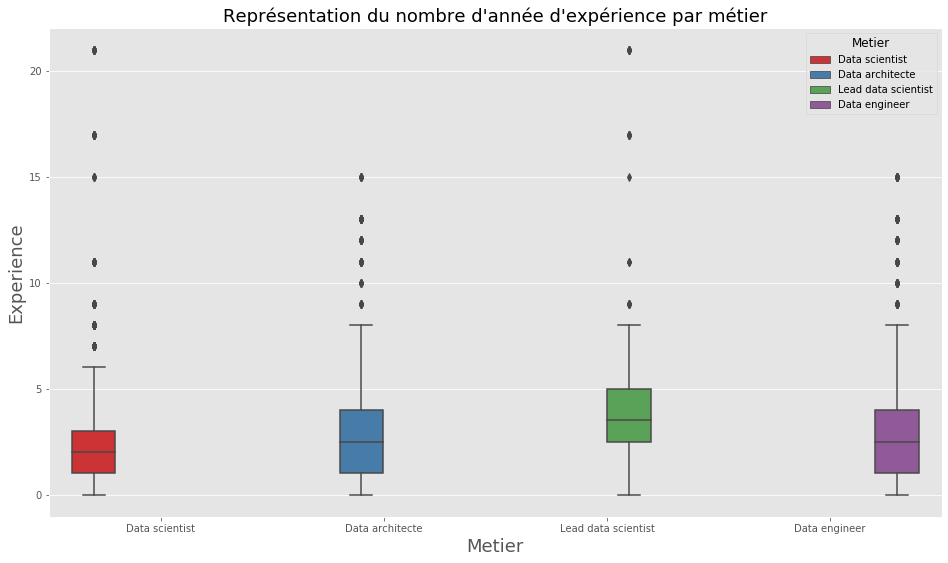

In [553]:
plt.figure(figsize=(16, 9))
b =  sb.boxplot(x="Metier", y="Experience",
            hue="Metier", data=df, palette="Set1")

b.axes.set_xlabel("Metier",fontsize=18)
b.axes.set_ylabel("Experience",fontsize=18)
b.axes.set_title("Représentation du nombre d'année d'expérience par métier",fontsize=18)

### 6) Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert
- Veuillez expliquer votre choix du règle de transformation.  

**Step 1: Imputation of `Experience` missing values**

Sum of the raaining missing values

In [554]:
df['Experience'].isna().sum()

42

The experiences' missing velues associated to data architect and lead data scientist are going to be impute by the mean value of this category.

In [555]:
ExpDA = df['Experience'][df['Metier'] == 'Data architecte']
MeanExpDA = ExpDA.mean(axis=0, skipna=True)
'The meadian experience for data scientists is equal to {}'.format(MeanExpDE)
"There are {} 'experience' missing values for data architecte.".format(df["Experience"][df["Metier"] == 'Data architecte'].isna().sum())

"There are 23 'experience' missing values for data architecte."

In [556]:
IndexMissingValuesDA  = list(df[df['Metier'] == 'Data architecte'].loc[df['Experience'].isnull(),'Experience'].index)
df.iloc[IndexMissingValuesDA, 4] =  MeanExpDA

In [557]:
ExpLDS = df['Experience'][df['Metier'] == 'Lead data scientist']
MeanExpLDS = ExpLDS.mean(axis=0, skipna=True)
'The meadian experience for data scientists is equal to {}'.format(MeanExpLDS)
"There are {} 'experience' missing values for data architecte.".format(df["Experience"][df["Metier"] == 'Lead data scientist'].isna().sum())

"There are 19 'experience' missing values for data architecte."

In [558]:
IndexMissingValuesLDS  = list(df[df['Metier'] == 'Lead data scientist'].loc[df['Experience'].isnull(),'Experience'].index)
df.iloc[IndexMissingValuesLDS , 4] =  MeanExpLDS


**Step 2: Imputation of `Metier` missing values**

Substitute missing values in the column `Metier` by "Unknown":

In [559]:
df['Metier'].isna().sum()

19

In [560]:
df['Metier'] = df['Metier'].fillna('Unknown')

**Step 3: Filling of `Exp_label` column**

Brouillon pour Aury:
* Nous calculons les 3 premiers quantiles (.25, .5 et .75)par métier,
* Et nous associons les catégories selon la règle suivante:
   * If Exp < quantile(0.25) => Exp_label = Débutant
   * Elif  Exp in [quantile(0.25), quantile(0.5)) = Confirmé
   
   * Elif Exp in [quantile(0.5), quantile(0.75)) = Avancé
   
   * Else Exp >= quantile(0.75) = Expert

Creation of an empty column named 'Exp_label':

In [561]:
df['Exp_label'] = np.nan

In [562]:
"""MetierL= list(set(df['Metier']))
quantile_label = {0.25:'debutant', 0.5:'confirme', 0.75:'avance', 0.76:'expert'}
for i in MetierL:
    for ql in quantile_label:
        if ql <= 0.75:
            ind = list(df[(df['Metier'] == i) & (df['Exp_label'].isna())].loc[df['Experience'] < df['Experience'].quantile(q=ql),'Experience'].index)
            df.iloc[ind , 6] = quantile_label[ql]
        else: # Expert class
            ind = list(df[(df['Metier'] == i) & (df['Exp_label'].isna())].index)
            df.iloc[ind , 6] = quantile_label[ql]"""

"MetierL= list(set(df['Metier']))\nquantile_label = {0.25:'debutant', 0.5:'confirme', 0.75:'avance', 0.76:'expert'}\nfor i in MetierL:\n    for ql in quantile_label:\n        if ql <= 0.75:\n            ind = list(df[(df['Metier'] == i) & (df['Exp_label'].isna())].loc[df['Experience'] < df['Experience'].quantile(q=ql),'Experience'].index)\n            df.iloc[ind , 6] = quantile_label[ql]\n        else: # Expert class\n            ind = list(df[(df['Metier'] == i) & (df['Exp_label'].isna())].index)\n            df.iloc[ind , 6] = quantile_label[ql]"

In [563]:
quantile_label = {0.25:'debutant', 0.5:'confirme', 0.75:'avance', 0.76:'expert'}
for ql in quantile_label:
    if ql <= 0.75:
        ind = list(df[(df['Exp_label'].isna())].loc[df['Experience'] < df['Experience'].quantile(q=ql),'Experience'].index)
        df.iloc[ind , 6] = quantile_label[ql]
    else: # Expert class
        ind = list(df[(df['Exp_label'].isna())].index)
        df.iloc[ind , 6] = quantile_label[ql]

**Step 4: Représentation graphique**

Text(0.5, 1.0, "Répartion des niveaux d'expériece par métier")

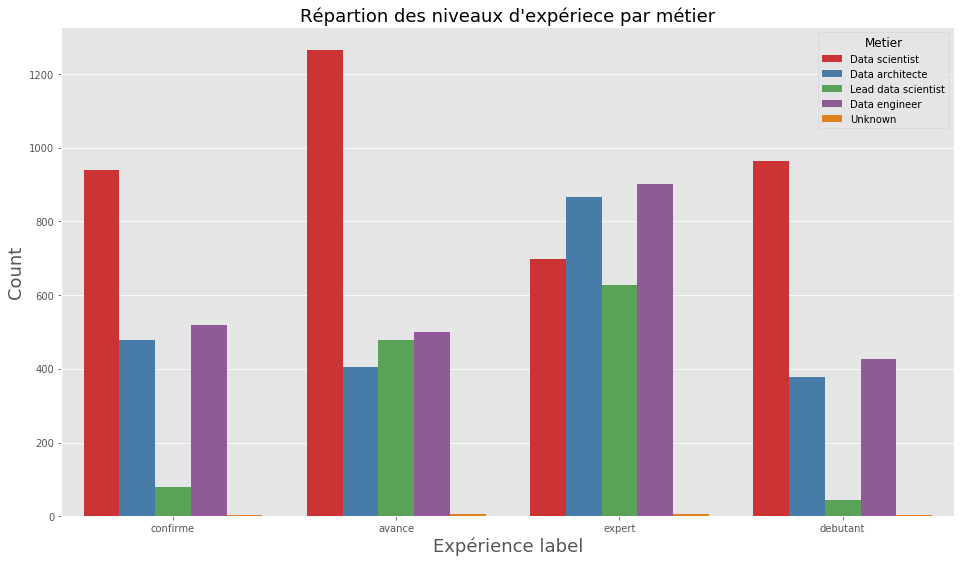

In [564]:
plt.figure(figsize=(16, 9))
b =  sb.countplot( x="Exp_label", hue="Metier", data=df, palette="Set1")

b.axes.set_xlabel("Expérience label",fontsize=18)
b.axes.set_ylabel("Count",fontsize=18)
b.axes.set_title("Répartion des niveaux d'expériece par métier",fontsize=18)

### 7) Quelles sont les 5 technologies les plus utilisées? Faites un graphique

### 8) Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître 2 clusters que vous jugerez pertinents. Donnez les caractéristiques de chacun des clusters.
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

In [30]:
s = pd.Series(list(df['Entreprise']))
one_hot_encoding_entreprise = pd.get_dummies(s)
one_hot_encoding_entreprise.shape
indexL = []
one_hot_encoding_entreprise.sum(axis=1)
for i in range(one_hot_encoding_entreprise.shape[1]):
    if one_hot_encoding_entreprise.iloc[:,i].sum() < 30:
        indexL.append(i)
one_hot_encoding_entreprise = one_hot_encoding_entreprise.drop(one_hot_encoding_entreprise.columns[indexL], axis=1)

In [31]:
# technologie
Ltechno = []
techno = df['Technologies']
for i in range(len(techno)):
    v = re.split('/', techno[i], flags=re.IGNORECASE)
    for i in range(len(v)):
        Ltechno.append(v[i])
set_Techno = list(set(Ltechno))
set_Techno = set_Techno[1:len(set_Techno)] # Remove the empty techno

MTechno = np.zeros((df.shape[0], len(set_Techno)))
dfTechno = pd.DataFrame(MTechno)

In [32]:
for i in range(len(set_Techno)):
    for j in range(df.shape[0]):
        if df['Technologies'][j].find(set_Techno[i]) != -1:
            dfTechno.iloc[j,i] = 1

In [575]:
list(set(Ltechno))

['',
 'PIG',
 'Windows',
 'SQL',
 'Machine learning',
 'Scoring',
 'NoSQ',
 'Map-Reduce',
 'Matlab',
 'Tensorflow',
 'Teradata',
 'Pyspark',
 'Excel',
 'Hive',
 'Tableau',
 'VBA',
 'SPSS',
 'ORACLE',
 'MongoDB',
 'AI',
 'Big data',
 'Pycharm',
 'Vertica',
 'Matplotlib',
 'PostgreSQL',
 'Perl',
 'MariaDB',
 'Spark',
 'Scala',
 'Microsoft Azure',
 'R',
 'Scikit-learn',
 'machine learning',
 'Cassandra',
 'Anglais',
 'GNU',
 'Redshift',
 'PySpark',
 'anglais',
 'Linux',
 'Hadoop(HDFS)',
 'Elasticsearch',
 'SAS',
 'Python',
 'AWS',
 'Yarn',
 'Deep learning',
 'C++',
 'Kafka',
 'HBASE',
 'HDFS',
 'Hadoop',
 'Docker',
 'numpy',
 'Java',
 'scikit-learn',
 'Kibana',
 'Ruby',
 'NoSQL',
 'MySQL',
 'C']

In [577]:
dfTechno.columns =  list(set(Ltechno))[1:]

In [578]:
dfTechno

,PIG,Windows,SQL,Machine learning,Scoring,NoSQ,Map-Reduce,Matlab,Tensorflow,Teradata,...,Hadoop,Docker,numpy,Java,scikit-learn,Kibana,Ruby,NoSQL,MySQL,C
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [579]:
# metier 
df['Metier'] =  df['Metier'].fillna('Unknown')
s_metier = pd.Series(list(df['Metier']))
one_hot_encoding_metier = pd.get_dummies(s_metier)

In [580]:
# Diplome 
s_diplome = pd.Series(list(df['Diplome']))
one_hot_encoding_diplome = pd.get_dummies(s_diplome)

In [581]:
# Experience
s_experience = pd.Series(list(df['Exp_label']))
one_hot_encoding_experience = pd.get_dummies(s_experience)

In [582]:
# Ville
s_ville = pd.Series(list(df['Ville']))
one_hot_encoding_ville = pd.get_dummies(s_ville)

In [585]:
# merge all data transform
df_merge = pd.concat([one_hot_encoding_diplome, one_hot_encoding_entreprise,
                    one_hot_encoding_ville, dfTechno, one_hot_encoding_metier ], axis=1) # ATTENTION !!!!

### 9) Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

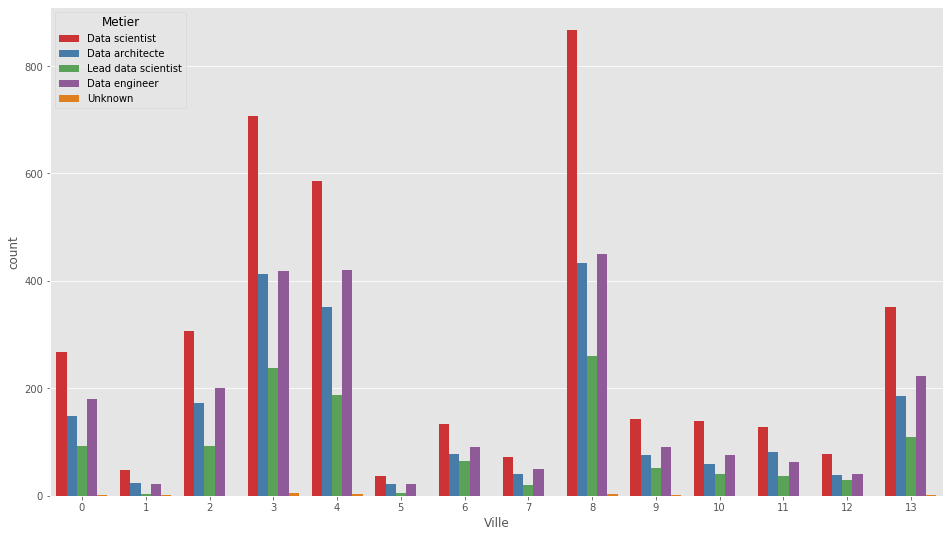

In [586]:
plt.figure(figsize=(16, 9))
b =  sb.countplot( x="Ville", hue= "Metier", data=df, palette="Set1")

Brouillon Aury:
* On éimine une régression logistique car on ne peut pas déterminer sur des variables uniquement catégorielles si les données sont linéairement séparables "Too many categorical variables are also a problem for logistic regression. "

* Decision Trees Pros:
    * Intuitive Decision Rules
       * Can handle non-linear features
        * Take into account variable interactions
    * Decision Trees Cons:
        * Highly biased to training set [Random Forests to your rescue]
        * No ranking score as direct result

**Step 1: Data preprocessing**

Replace categorial data by one hot encoding for the variable `entrepresie`, and eliminate each `compay` which has less than 30 employees. We can consider that these ones are not informative.

In [587]:
df_merge = pd.concat([one_hot_encoding_experience, df_merge], axis =1 ) # Add experience
#Create separated a table with the individus linked to an unknown work and delete them from df_merge
indexUnknown = df_merge[ df_merge['Unknown'] == 1 ].index
dfUnknown = df_merge.iloc[indexUnknown , ]
df_merge.drop(indexUnknown, inplace=True)


In [588]:
df_merge = df_merge.iloc[: , :df_merge.shape[1] - 5]
dfUnknown = dfUnknown.iloc[: , : dfUnknown.shape[1] - 5] # Delete the columns metier => Y

Creation of the Y variable:

In [589]:
dfMetierKnown =  df['Metier']
IndexMissingMetier  = list(dfMetierKnown[dfMetierKnown == 'Unknown'].index)
dfMetierKnown.drop(IndexMissingMetier  , inplace=True)

In [590]:
dfMetierKnown.shape
df_merge.shape

(9563, 131)

**Step2: Training and test set:**
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [591]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [592]:
X_train, X_test, y_train, y_test = train_test_split( df_merge , dfMetierKnown, test_size=0.33, random_state=42)

**Variable selection:**

In [593]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

Feature 0: 132.467241
Feature 1: 104.895525
Feature 2: 149.895365
Feature 3: 300.291057
Feature 4: 57.579539
Feature 5: 13.123476
Feature 6: 491.068742
Feature 7: 404.248727
Feature 8: 1.500879
Feature 9: 4.490248
Feature 10: 5.791426
Feature 11: 17.422081
Feature 12: 84.366536
Feature 13: 2.212107
Feature 14: 33.481794
Feature 15: 3.953293
Feature 16: 6.987168
Feature 17: 19.348062
Feature 18: 48.039095
Feature 19: 5.456343
Feature 20: 2.183064
Feature 21: 13.632936
Feature 22: 10.544557
Feature 23: 6.961628
Feature 24: 6.233859
Feature 25: 3.434285
Feature 26: 7.922847
Feature 27: 4.160805
Feature 28: 9.611000
Feature 29: 28.496328
Feature 30: 3.296306
Feature 31: 5.225002
Feature 32: 2.404831
Feature 33: 3.206276
Feature 34: 8.581574
Feature 35: 3.259150
Feature 36: 4.165732
Feature 37: 10.541330
Feature 38: 3.790705
Feature 39: 4.020175
Feature 40: 4.772655
Feature 41: 6.316098
Feature 42: 6.583508
Feature 43: 0.219646
Feature 44: 5.815056
Feature 45: 4.608563
Feature 46: 10.098698

<BarContainer object of 131 artists>

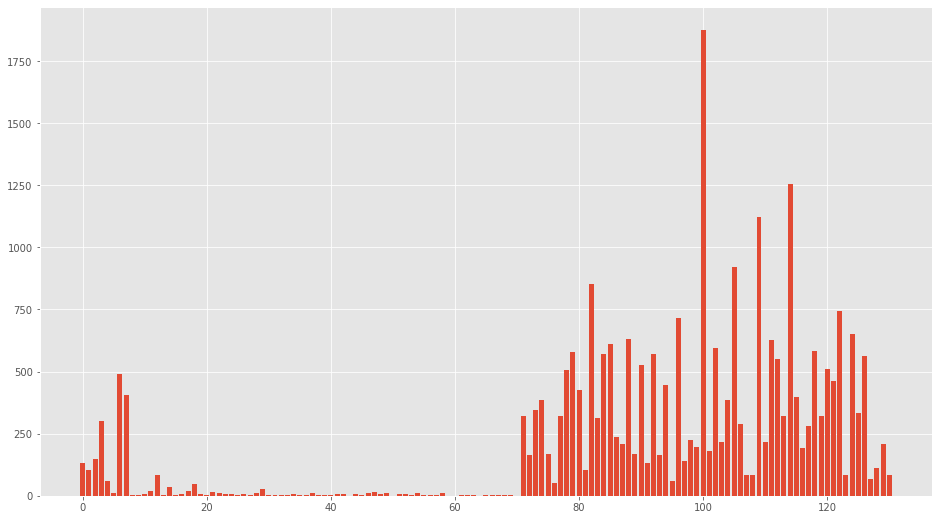

In [594]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

plt.figure(figsize=(16, 9))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)


In [595]:
fsScore  =  pd.DataFrame( fs.scores_)
ThresholdScore = fsScore.iloc[:,0].quantile(0.001)

In [596]:
IndexKeptFeatures = fsScore[fsScore.iloc[:,0] > ThresholdScore].index

In [597]:
X_train_s = X_train.iloc[:, IndexKeptFeatures]
X_test_s = X_test.iloc[:, IndexKeptFeatures] 

In [598]:
print(X_train_s.shape)
X_test_s.shape

(6407, 130)


(3156, 130)

In [599]:
df_merge.columns[IndexKeptFeatures]

Index([                             0,                              1,
                                    2,                              3,
                                    0,                              1,
                                    2,                              3,
                          'Accenture', 'Advanced Micro Devices, Inc.',
       ...
                             'Hadoop',                       'Docker',
                              'numpy',                         'Java',
                       'scikit-learn',                       'Kibana',
                               'Ruby',                        'NoSQL',
                              'MySQL',                            'C'],
      dtype='object', length=130)

**ExtraTreesClassifier**

In [600]:
from sklearn.ensemble import ExtraTreesClassifier

In [601]:
clf = ExtraTreesClassifier(n_estimators=500)

In [602]:
clf.fit(X_train_s, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=500,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [603]:
y_pred = clf.predict(X_test_s)

In [604]:
y_pred

array(['Data engineer', 'Data engineer', 'Data scientist', ...,
       'Data scientist', 'Data architecte', 'Data architecte'],
      dtype=object)

In [605]:
y_test

9019          Data engineer
5035          Data engineer
1143         Data scientist
1356         Data scientist
8755    Lead data scientist
               ...         
1098         Data scientist
549           Data engineer
8144    Lead data scientist
6345        Data architecte
4627        Data architecte
Name: Metier, Length: 3156, dtype: object

In [606]:
prec = float(np.sum(y_pred == y_test)) / len(y_test)

In [607]:
prec

0.8833967046894804

**Random Forest**

In [364]:
from sklearn.ensemble import RandomForestClassifier

In [365]:
clf = RandomForestClassifier(n_estimators = 500, min_samples_split = 50 , random_state=0)
clf.fit(X_train_s, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [366]:
y_pred = clf.predict(X_test_s)

In [367]:
y_test

9019          Data engineer
5035          Data engineer
1143         Data scientist
1356         Data scientist
8755    Lead data scientist
               ...         
1098         Data scientist
549           Data engineer
8144    Lead data scientist
6345        Data architecte
4627        Data architecte
Name: Metier, Length: 3156, dtype: object

In [368]:
prec = float(np.sum(y_pred == y_test)) / len(y_test)

In [369]:
prec

0.44930291508238274

**KNN**

In [370]:
from sklearn.neighbors import KNeighborsClassifier

In [371]:
neigh = KNeighborsClassifier(n_neighbors=120)

In [372]:
neigh.fit(X_train_s, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=120, p=2,
                     weights='uniform')

In [373]:
y_predKnn = neigh.predict(X_test_s)

In [374]:
prec = float(np.sum(y_predKnn == y_test)) / len(y_test)
prec

0.46387832699619774

**MICE**

In [375]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [376]:
X_Missing =  df_merge

In [377]:
imputer = IterativeImputer( random_state=0,sample_posterior=True)
imputer.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=True, tol=0.001, verbose=0)

In [378]:
impute_scores = cross_val_score(estimator, df_merge, df_merge,
                                    scoring='precision',
                                    cv=N_SPLITS)

NameError: name 'estimator' is not defined

**Neural network**

In [379]:
import tensorflow as tf

In [380]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(900, activation='relu'),
     # tf.keras.layers.Dense(20, activation='relu'),
          tf.keras.layers.Dense(500, activation='relu'),

          tf.keras.layers.Dense(200, activation='relu'),

       #   tf.keras.layers.Dense(100, activation='relu'),

             tf.keras.layers.Dense(50, activation='relu'),


     # tf.keras.layers.Dense(100, activation='sigmoid'),
   #   tf.keras.layers.Dense(5, activation='sigmoid'),
   #   tf.keras.layers.Dense(3, activation='sigmoid'),



  tf.keras.layers.Dense(4, activation='softmax')
])

In [381]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [382]:
X_train_s = np.array(X_train_s)
y_train = y_train.astype('category')
y_train = np.array(y_train.cat.codes)

In [383]:

#y_train.head
model.fit(X_train_s, y_train, epochs=40)

Train on 6407 samples
Epoch 1/40
6407/6407 [==============================] - 3s 435us/sample - loss: 1.1939 - accuracy: 0.4612
Epoch 2/40
6407/6407 [==============================] - 3s 396us/sample - loss: 1.1557 - accuracy: 0.4632
Epoch 3/40
6407/6407 [==============================] - 2s 389us/sample - loss: 1.1395 - accuracy: 0.4820
Epoch 4/40
6407/6407 [==============================] - 2s 348us/sample - loss: 1.1255 - accuracy: 0.4826
Epoch 5/40
6407/6407 [==============================] - 2s 359us/sample - loss: 1.1102 - accuracy: 0.4941
Epoch 6/40
6407/6407 [==============================] - 2s 352us/sample - loss: 1.0922 - accuracy: 0.5107
Epoch 7/40
6407/6407 [==============================] - 2s 347us/sample - loss: 1.0742 - accuracy: 0.5138
Epoch 8/40
6407/6407 [==============================] - 2s 351us/sample - loss: 1.0555 - accuracy: 0.5269
Epoch 9/40
6407/6407 [==============================] - 2s 349us/sample - loss: 1.0323 - accuracy: 0.5386
Epoch 10/40
6407/6407 [=

In [386]:
X_test_s.shape
#y_test.shape

(3156, 70)

In [389]:
X_test_s = np.array(X_test_s)
y_test = y_test.astype('category')
y_test = np.array(y_test.cat.codes)

In [390]:
test_loss, test_acc = model.evaluate(X_test_s,  y_test )

3156/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [391]:
test_loss, test_acc 

(2.492930866617365, 0.4435995)

**Différente discrétisation**

In [565]:
df

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,confirme
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,avance
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,avance
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,confirme
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,avance
...,...,...,...,...,...,...,...
9577,Massachusetts General Hospital(MGH),Data scientist,C++/R/Python/Matlab/Matplotlib,Master,1.5,Lyon,confirme
9578,Charles River Analytics,Data scientist,Excel/Python/Matlab/R/machine learning/anglais,Master,11.0,Toulouse,expert
9579,Ball Aerospace,Data scientist,R/machine learning/Excel/VBA,Master,1.0,Paris,confirme
9580,Takeda Pharmaceutical,Data scientist,Python/Pyspark/machine learning/Microsoft Azure,Master,17.0,Rennes,expert


In [566]:
df2 = df

In [567]:
df['Metier'].isna().sum()

0

In [569]:
df2['Entreprise']= df2['Entreprise'].astype('category', inplace = True)
df2['Diplome']= df2['Diplome'].astype('category', inplace = True)
df2['Ville'] = df2['Ville'].astype('category', inplace = True)
df2['Exp_label'] = df2['Exp_label'].astype('category', inplace = True)


In [528]:
df2['Metier'] = df2['Metier'].fillna('Unknown')

In [570]:
df2.dtypes

Entreprise      category
Metier            object
Technologies      object
Diplome         category
Experience       float64
Ville           category
Exp_label       category
dtype: object

In [571]:
df2['Entreprise']  = df2.Entreprise.cat.codes
df2['Diplome']  = df2.Diplome.cat.codes
df2['Ville']  = df2.Ville.cat.codes
df2['Exp_label'] = df2.Exp_label.cat.codes

In [572]:
df2.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label
0,1075,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,1,1.0,8,1
1,797,Data architecte,Python/Java/Scala/MongoDB,1,3.0,4,0
2,401,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,1,3.0,6,0
3,99,Data scientist,C/C++/Java/Python,1,1.5,4,1
4,120,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,3,2.0,0,0


In [573]:
set(list(df2['Metier']))

{'Data architecte',
 'Data engineer',
 'Data scientist',
 'Lead data scientist',
 'Unknown'}

In [ ]:
df2M = pd.concat([one_hot_encoding_, df2], axis =1 ) # Add experience



In [513]:
df2MetierKnown =  df2['Metier']
IndexMissingMetier  = list(df2MetierKnown[df2MetierKnown == 'Unknown'].index)
df2MetierKnown.drop(IndexMissingMetier  , inplace=True)
df2MetierUnKnown =  df2.iloc[IndexMissingMetier  , : ]


df2UK  = df2.iloc[IndexMissingMetier , : ]
df2K = df2
df2K.drop(IndexMissingMetier, inplace=True)
#df2K.drop(IndexMissingMetier, inplace=True)

In [514]:
IndexMissingMetier

[]

In [423]:
df2K.drop(columns=['Metier'], inplace = True)
df2UK.drop(columns=['Metier'])

,Entreprise,Technologies,Diplome,Experience,Ville,Exp_label


In [505]:
df2UK

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label


### 10) Décrire de façon détaillée les différentes étapes pour mener à bien un projet data complexe.

Dans le cadre d’une campagne de recrutement vous avez reçu un ensemble de cv qui ne sont pas à jour (le poste actuel n’est pas présent). Deux exemple de CV vous sont donnés en pièce jointe (il n'y a pas de mise en page type). Tous les CV sont au format PDF.

On souhaite connaitre le poste actuel de chaque candidat.

-  Quelles sont les différentes étapes nécessaires à la réalisation d'un tel projet?
-  Pour chaque étape, détaillez les taches à accomplir, les méthodes à suivre, les pistes possibles, les points critiques.
-  Justifiez consciencieusement vos choix


In [ ]:
set(list(df['Metier']))